In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
pd.set_option('display.max_columns', None)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf

#### Load Data

In [25]:
test = pd.read_csv("../PreparedData/test.csv")
train = pd.read_csv("../PreparedData/train.csv")

# Final Tweaks to Data before feeding into Neural Network

## One hot encode categorical columns

In [26]:
columns_to_encode = train.columns[train.dtypes == 'object']
columns_to_encode[0]

'field_edu'

In [27]:
train = pd.get_dummies(train,columns= columns_to_encode, drop_first=True)
train.head(5)

,user_id,moved_after_2019,companies_worked,positions_worked,days_worked,max_days_worked,min_days_worked,avg_days_worked,total_days_worked,Business,Design,IT,Other,N_Skills,English,German,Turkish,French,Spanish,Chinese,NLanguages,degree_edu,Edu_Finished,Edu_Ongoing,Unknown_Edu_Status,field_edu_Engineering,field_edu_Mathematics,field_edu_Other,field_edu_Science
0,1301,1,4.0,4.0,153.0,882.0,-304.0,335.0,1341.0,2.0,0.0,4.0,17.0,23.0,3.000000,0.00000,5.000000,0.000000,0.000000,0.000000,4.000000,2.0,1.0,0.0,0.0,0,0,1,0
1,6950,0,4.0,6.0,426.0,699.0,182.0,350.0,2101.0,0.0,0.0,17.0,32.0,49.0,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,1.0,1.0,0.0,0.0,0,0,1,0
2,4880,0,4.0,4.0,424.0,610.0,273.0,456.0,1826.0,0.0,2.0,4.0,15.0,21.0,3.000871,0.29212,2.753424,0.079602,0.063092,0.007033,2.039081,2.0,1.0,0.0,0.0,0,0,1,0
3,26046,0,1.0,4.0,395.0,1553.0,395.0,852.0,3409.0,0.0,0.0,7.0,23.0,30.0,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,2.0,1.0,0.0,0.0,0,0,0,0
4,11005,0,3.0,3.0,334.0,2435.0,334.0,1136.0,3409.0,0.0,1.0,10.0,37.0,48.0,3.000000,0.00000,5.000000,0.000000,0.000000,0.000000,3.000000,1.0,1.0,0.0,0.0,0,0,1,0


In [28]:
test = pd.get_dummies(test,columns= columns_to_encode, drop_first=True)
test.head(5)

,user_id,moved_after_2019,companies_worked,positions_worked,days_worked,max_days_worked,min_days_worked,avg_days_worked,total_days_worked,Business,Design,IT,Other,N_Skills,English,German,Turkish,French,Spanish,Chinese,NLanguages,degree_edu,Edu_Finished,Edu_Ongoing,Unknown_Edu_Status,field_edu_Engineering,field_edu_Mathematics,field_edu_Other,field_edu_Science
0,17449,2,3.000000,3.000000,0.000000,4017.000000,0.000000,2191.000000,6574.000000,1.0,0.0,11.0,22.0,34.0,3.000871,0.29212,2.753424,0.079602,0.063092,0.007033,2.039081,2.0,1.0,0.0,0.0,1,0,0,0
1,33967,2,2.000000,2.000000,730.000000,730.000000,214.000000,472.000000,944.000000,2.0,9.0,1.0,19.0,31.0,5.000000,0.00000,5.000000,0.000000,0.000000,1.000000,2.000000,4.0,1.0,0.0,0.0,1,0,0,0
2,2110,2,2.814964,3.309003,884.214057,1262.226409,281.970936,726.630486,2088.604064,3.0,0.0,2.0,8.0,13.0,2.000000,1.00000,5.000000,0.000000,0.000000,0.000000,4.000000,2.0,1.0,0.0,0.0,0,0,1,0
3,55082,2,2.000000,2.000000,2011.000000,2011.000000,699.000000,1355.000000,2710.000000,0.0,0.0,12.0,25.0,37.0,2.000000,0.00000,2.000000,0.000000,0.000000,0.000000,1.000000,2.0,1.0,0.0,0.0,0,0,0,0
4,37165,2,1.000000,1.000000,944.000000,944.000000,944.000000,944.000000,944.000000,0.0,0.0,0.0,4.0,4.0,4.000000,0.00000,5.000000,0.000000,0.000000,0.000000,2.000000,1.0,1.0,0.0,0.0,1,0,0,0


### Set bool columns to int

In [29]:
train[train.columns[train.dtypes == 'bool']] = train[train.columns[train.dtypes == 'bool']].astype(int)
test[test.columns[test.dtypes == 'bool']] = test[test.columns[test.dtypes == 'bool']].astype(int)

Drop some columns

In [30]:
train.columns

Index(['user_id', 'moved_after_2019', 'companies_worked', 'positions_worked',
       'days_worked', 'max_days_worked', 'min_days_worked', 'avg_days_worked',
       'total_days_worked', 'Business', 'Design', 'IT', 'Other', 'N_Skills',
       'English', 'German', 'Turkish', 'French', 'Spanish', 'Chinese',
       'NLanguages', 'degree_edu', 'Edu_Finished', 'Edu_Ongoing',
       'Unknown_Edu_Status', 'field_edu_Engineering', 'field_edu_Mathematics',
       'field_edu_Other', 'field_edu_Science'],
      dtype='object')

In [31]:
columns_to_drop =  ['German', 'Turkish', 'French', 'Spanish', 'Chinese']

In [32]:
train.drop(columns_to_drop, axis=1, inplace=True)
test.drop(columns_to_drop, axis=1, inplace=True)

In [33]:
train.head()

,user_id,moved_after_2019,companies_worked,positions_worked,days_worked,max_days_worked,min_days_worked,avg_days_worked,total_days_worked,Business,Design,IT,Other,N_Skills,English,NLanguages,degree_edu,Edu_Finished,Edu_Ongoing,Unknown_Edu_Status,field_edu_Engineering,field_edu_Mathematics,field_edu_Other,field_edu_Science
0,1301,1,4.0,4.0,153.0,882.0,-304.0,335.0,1341.0,2.0,0.0,4.0,17.0,23.0,3.000000,4.000000,2.0,1.0,0.0,0.0,0,0,1,0
1,6950,0,4.0,6.0,426.0,699.0,182.0,350.0,2101.0,0.0,0.0,17.0,32.0,49.0,3.000000,3.000000,1.0,1.0,0.0,0.0,0,0,1,0
2,4880,0,4.0,4.0,424.0,610.0,273.0,456.0,1826.0,0.0,2.0,4.0,15.0,21.0,3.000871,2.039081,2.0,1.0,0.0,0.0,0,0,1,0
3,26046,0,1.0,4.0,395.0,1553.0,395.0,852.0,3409.0,0.0,0.0,7.0,23.0,30.0,2.000000,2.000000,2.0,1.0,0.0,0.0,0,0,0,0
4,11005,0,3.0,3.0,334.0,2435.0,334.0,1136.0,3409.0,0.0,1.0,10.0,37.0,48.0,3.000000,3.000000,1.0,1.0,0.0,0.0,0,0,1,0


## Standard scaling

In [34]:
train.columns

Index(['user_id', 'moved_after_2019', 'companies_worked', 'positions_worked',
       'days_worked', 'max_days_worked', 'min_days_worked', 'avg_days_worked',
       'total_days_worked', 'Business', 'Design', 'IT', 'Other', 'N_Skills',
       'English', 'NLanguages', 'degree_edu', 'Edu_Finished', 'Edu_Ongoing',
       'Unknown_Edu_Status', 'field_edu_Engineering', 'field_edu_Mathematics',
       'field_edu_Other', 'field_edu_Science'],
      dtype='object')

In [35]:
#features_to_scale = train.columns[train.dtypes == 'float64']
features_to_scale = ['companies_worked', 'positions_worked',
       'days_worked', 'max_days_worked', 'min_days_worked', 'avg_days_worked',
       'total_days_worked', 'Business', 'Design', 'IT', 'Other', 'N_Skills',
       'English', 'NLanguages', 'degree_edu']

In [36]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
train_scale = train[features_to_scale]
scaler.fit(train_scale)
X_scaled = scaler.transform(train_scale)
train[features_to_scale] = X_scaled


scaler = StandardScaler()
test_scale  = test[features_to_scale]
scaler.fit(train_scale)
X_scaled = scaler.transform(test_scale)
test[features_to_scale] = X_scaled


Drop user id column

In [37]:
# store them just in case
train_users = train['user_id']
test_users = test['user_id']

train = train.drop(['user_id'], axis=1)
test = test.drop(['user_id'], axis=1)

In [38]:
train.columns

Index(['moved_after_2019', 'companies_worked', 'positions_worked',
       'days_worked', 'max_days_worked', 'min_days_worked', 'avg_days_worked',
       'total_days_worked', 'Business', 'Design', 'IT', 'Other', 'N_Skills',
       'English', 'NLanguages', 'degree_edu', 'Edu_Finished', 'Edu_Ongoing',
       'Unknown_Edu_Status', 'field_edu_Engineering', 'field_edu_Mathematics',
       'field_edu_Other', 'field_edu_Science'],
      dtype='object')

Drop labels

In [39]:
y = train['moved_after_2019']
#y_test = test['Litres']

train = train.drop(labels=['moved_after_2019'],axis=1)

X_test = test.drop(labels=['moved_after_2019'],axis=1)


Train, test, valid split

In [40]:
# Test train split
X_train_, X_train_test, y_train_, y_train_test = train_test_split(train, y, test_size=0.2, stratify=y)

# Train valid split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_, y_train_, test_size=0.2,stratify=y_train_)


Performance Plotting Functions

In [49]:
def model_evolution_loss(history,y_lim1=0,y_lim2=0.75):  
    # summarize history for loss
    plt.ylim(y_lim1,y_lim2)
    plt.plot(history.history['val_loss'],color='r',label="Validation")
    plt.plot(history.history['loss'],color='b',label="Training")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

def model_evolution_metric(history,metric,y_lim1=0,y_lim2=0.75):  
    # summarize history for loss
    plt.ylim(y_lim1,y_lim2)
    plt.plot(history.history[f'val_{metric}'],color='r',label="Validation")
    plt.plot(history.history[f'{metric}'],color='b',label="Training")
    plt.title(f'model {metric}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

# Evaluate accuracy on training set
def test_set_evalution(model, X_train, X_valid, y_train, y_valid,X_train_test,y_train_test):
    print("Train set evaluation:", model.evaluate(X_train,y_train))
    print("Valid set evaluation:", model.evaluate(X_valid,y_valid))
    print("Test set evaluation:", model.evaluate(X_train_test,y_train_test))

In [42]:
n_input = X_train.shape[1]
n_input

22

Design NN

NN1

In [123]:
inputs = tf.keras.Input(shape=(n_input,))
x = tf.keras.layers.Dense(32, activation='relu')(inputs)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compiling the model with binary crossentropy loss and categorical accuracy metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model with your training data
#model.fit(X_train, y_train, epochs=10, batch_size=32)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=200, batch_size = 1024,validation_data=(X_valid,y_valid), verbose=1)
#history = model.fit(X_train, y_train, epochs=200, batch_size = 1024,validation_data=(X_valid,y_valid),verbose=1,callbacks=[early_stopping])


Epoch 1/200
31/31 [==============================] - 1s 12ms/step - loss: 0.6087 - accuracy: 0.6747 - val_loss: 0.5416 - val_accuracy: 0.7403
Epoch 2/200
31/31 [==============================] - 0s 6ms/step - loss: 0.4692 - accuracy: 0.7826 - val_loss: 0.3696 - val_accuracy: 0.8486
Epoch 3/200
31/31 [==============================] - 0s 7ms/step - loss: 0.2909 - accuracy: 0.8823 - val_loss: 0.2193 - val_accuracy: 0.9093
Epoch 4/200
31/31 [==============================] - 0s 6ms/step - loss: 0.1869 - accuracy: 0.9243 - val_loss: 0.1612 - val_accuracy: 0.9312
Epoch 5/200
31/31 [==============================] - 0s 6ms/step - loss: 0.1426 - accuracy: 0.9401 - val_loss: 0.1283 - val_accuracy: 0.9460
Epoch 6/200
31/31 [==============================] - 0s 6ms/step - loss: 0.1158 - accuracy: 0.9513 - val_loss: 0.1076 - val_accuracy: 0.9556
Epoch 7/200
31/31 [==============================] - 0s 6ms/step - loss: 0.0986 - accuracy: 0.9576 - val_loss: 0.0939 - val_accuracy: 0.9612
Epoch 8/200


In [74]:
""" model = Sequential()

# hidden layers

model.add(Dense(units=16, activation='relu', input_dim=n_input))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=8,activation='relu'))

# final layer
model.add(Dense(units=1,activation=tf.keras.layers.ThresholdedReLU(theta=0.5,)))

# Compile model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='SGD', metrics=["CategoricalAccuracy"])

# Train NN with Early stopping on valid
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 1024,validation_data=(X_valid,y_valid), verbose=1,callbacks=[early_stopping])
 """

' model = Sequential()\n\n# hidden layers\n\nmodel.add(Dense(units=16, activation=\'relu\', input_dim=n_input))\nmodel.add(Dense(units=16,activation=\'relu\'))\nmodel.add(Dense(units=16,activation=\'relu\'))\nmodel.add(Dense(units=8,activation=\'relu\'))\nmodel.add(Dense(units=8,activation=\'relu\'))\n\n# final layer\nmodel.add(Dense(units=1,activation=tf.keras.layers.ThresholdedReLU(theta=0.5,)))\n\n# Compile model\nmodel.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=\'SGD\', metrics=["CategoricalAccuracy"])\n\n# Train NN with Early stopping on valid\nearly_stopping = EarlyStopping(monitor=\'val_loss\', mode=\'min\', patience=5, restore_best_weights=True)\n\nhistory = model.fit(X_train, y_train, epochs=100, batch_size = 1024,validation_data=(X_valid,y_valid), verbose=1,callbacks=[early_stopping])\n '

In [124]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

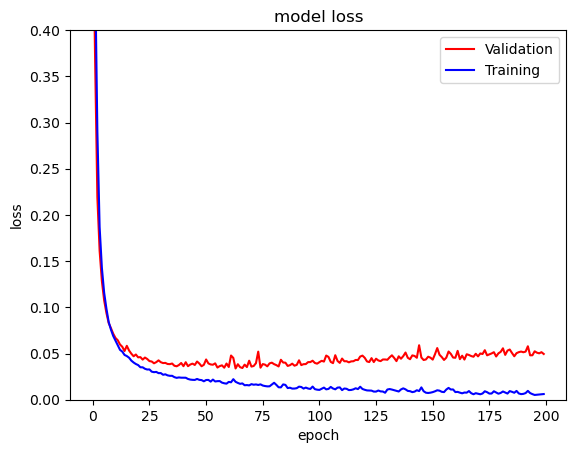

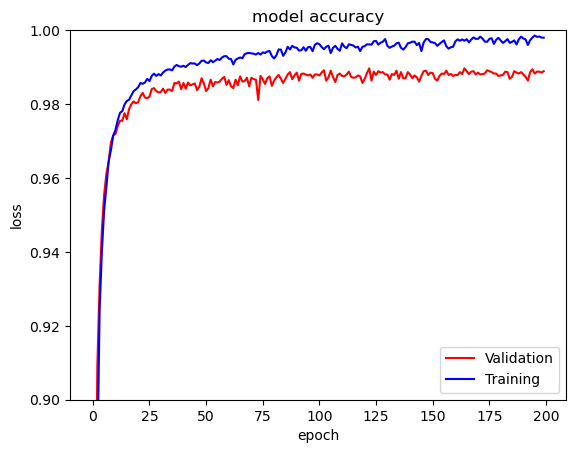

In [125]:
# Plot model evolution
model_evolution_loss(history,y_lim1=0.0,y_lim2=0.4)
model_evolution_metric(history,"accuracy",y_lim1=0.9,y_lim2=1)

In [126]:
# print metrics
test_set_evalution(model, X_train, X_valid, y_train, y_valid,X_train_test,y_train_test)
model.evaluate(X_train_test,y_train_test)

979/979 [==============================] - 3s 3ms/step - loss: 0.0056 - accuracy: 0.9982
Train set evaluation: [0.005601869430392981, 0.9981802105903625]
245/245 [==============================] - 1s 3ms/step - loss: 0.0495 - accuracy: 0.9889
Valid set evaluation: [0.04951261356472969, 0.9888902902603149]
306/306 [==============================] - 1s 3ms/step - loss: 0.0539 - accuracy: 0.9877
Test set evaluation: [0.053886279463768005, 0.9877413511276245]
306/306 [==============================] - 1s 3ms/step - loss: 0.0539 - accuracy: 0.9877


[0.053886279463768005, 0.9877413511276245]

Apply thresholding anad evaluate accuracy

In [133]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_train_test_pred = model.predict(X_train_test)

306/306 [==============================] - 1s 2ms/step


In [128]:
from sklearn.metrics import accuracy_score

def evaluate_thresholds(threshold,y_tp, y_t, y_vp, y_v, y_ttp, y_tt):
    print("Threshold: " , threshold)
    y_tp[ y_tp > threshold ] = 1
    y_tp[ y_tp <= threshold ] = 0
    # do the same for the other arrays
    y_vp[ y_vp > threshold ] = 1
    y_vp[ y_vp <= threshold ] = 0
    y_ttp[ y_ttp > threshold ] = 1
    y_ttp[ y_ttp <= threshold ] = 0
    print("Train: ", accuracy_score(y_t, y_tp), " Validation: ", accuracy_score(y_v, y_vp), 
    "Test: ", accuracy_score(y_tt, y_ttp))
    

In [134]:
evaluate_thresholds(0.2,y_train_pred, y_train, y_valid_pred, y_valid, y_train_test_pred, y_train_test)

Threshold:  0.2
Train:  0.9954983717514846  Validation:  0.986719448346316 Test:  0.9856982327101849


In [103]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_valid, y_valid_pred))
print(accuracy_score(y_train_test, y_train_test_pred))

0.9998722942340846
0.9876133316306985
0.987230564919808


In [104]:
print(y_train.mean())
print(y_valid.mean())
print(y_train_test.mean())

0.3360257965647149
0.33610011492785086
0.33598937583001326


## Now do prediction

In [139]:
X_test.shape

(13255, 22)

In [146]:
y_test_pred = model.predict(X_test) 

415/415 [==============================] - 1s 2ms/step


In [147]:
print(X_test.shape)
print(y_test_pred.shape)
print(y_test_pred.mean())
print(y_test_pred.sum())

(13255, 22)
(13255, 1)
0.015972553
211.71619


In [148]:
threshold = 0.9
y_test_pred[y_test_pred < threshold] = 0
y_test_pred[y_test_pred >= threshold] = 1

In [149]:
print(y_test_pred.mean())
print(y_test_pred.sum())

0.010033949
133.0


In [113]:
submission = pd.read_csv("..\OriginalData\submission.csv")

In [114]:
submission.head()

,user_id,moved_after_2019
0,17449,NaN
1,33967,NaN
2,2110,NaN
3,55082,NaN
4,37165,NaN


In [116]:
submission.moved_after_2019 = y_test_pred.astype(int)
submission

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0
...,...,...
13250,32847,0
13251,20054,0
13252,7029,0
13253,56130,0


In [119]:
submission.moved_after_2019.value_counts()

0    13087
1      168
Name: moved_after_2019, dtype: int64

In [121]:
submission.to_csv(f"..\Submissions\submission_t{threshold}.csv",index=False)